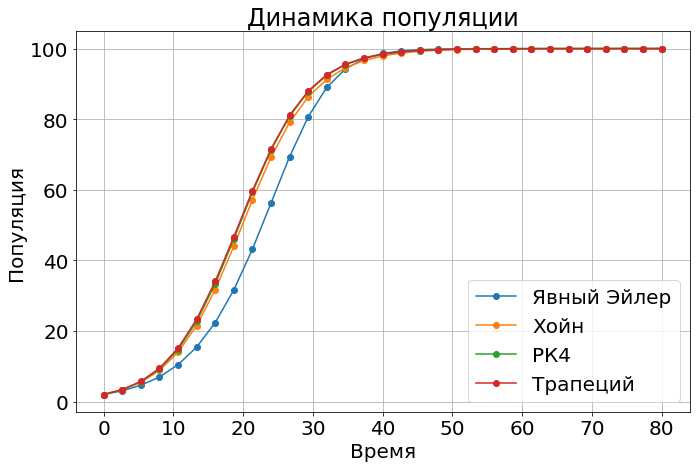

In [59]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
plt.rc('font', size=20)

class LogisticRightHandSide:
        
    def __init__(self, alpha, R):
        self._alpha = float(alpha)
        self._R = float(R)

    def __call__(self, u):
        return self._alpha*u*(1. - u/self._R)





class method:
  def __init__(self, alpha, R, N, end, initial ):
    self.alpha = float(alpha)
    self.R = float(R)
    self.N = N
    self.end = end
    self.initial = initial

    self.dt = self.end / self.N

    self.timeArray = np.linspace(0, self.end, self.N + 1)
    self.solutionArray = np.zeros(self.N + 1)
    self.solutionArray[0] = self.initial
  
  def __call__(self, f):
    raise NotImplementedError



class Euler(method):
  def __call__(self, f):
    for i in range(self.N):
      self.solutionArray[i + 1] = self.solutionArray[i] + self.dt*f(self.solutionArray[i])

    return self.timeArray, self.solutionArray

class RK4(method):
  def __call__(self, f):

    for i in range(self.N):
      k1 = f(self.solutionArray[i])
      k2 = f(self.solutionArray[i] + self.dt*k1/2)
      k3 = f(self.solutionArray[i] + self.dt*k2/2)
      k4 = f(self.solutionArray[i] + self.dt*k3)
      self.solutionArray[i + 1] = self.solutionArray[i] + self.dt*(k1 + 2*k2 + 2*k3 + k4)/6

    return self.timeArray, self.solutionArray


class Heun(method):
  def __call__(self, f):

    for i in range(self.N):
        uStar = self.solutionArray[i] + self.dt*f(self.solutionArray[i])
        self.solutionArray[i + 1] = self.solutionArray[i] + self.dt/2. * (f(self.solutionArray[i]) + f(uStar))

    return self.timeArray, self.solutionArray



class Trapec(method):

    def __call__(self, f):
        eps = 1e-3

        for i in range(self.N):
            u_old = self.solutionArray[i]

            un = smp.Symbol('x')

            F1 =  un - u_old - self.dt / 2 * (f(un) + f(u_old))

            F = smp.lambdify(un, F1)

            d_num_F = (F(un + self.dt) - F(un - self.dt)) / (2 * self.dt)
            Fdiff = smp.lambdify(un, d_num_F)
            
            uk0 = u_old
            uk1 = u_old + self.dt * f(u_old)

            while abs(uk1 - uk0) > eps:
                uk0 = uk1
                uk1 = uk1 - F(uk1) / Fdiff(uk1)

            self.solutionArray[i + 1] = uk1

        return self.timeArray, self.solutionArray



q = LogisticRightHandSide(0.2, 100)
z = Euler(0.2, 100, 30, 80, 2)
         
timeArrayEE, solutionArrayEE = z(q)
u = Heun(0.2, 100, 30, 80, 2)
e = RK4(0.2, 100, 30, 80, 2)
s = Trapec(0.2, 100, 30, 80, 2)
         
timeArray4, solutionArray4 = e(q)
timeArrayH, solutionArrayH = u(q)
timeArrayT, solutionArrayT = s(q)

 

plt.figure(figsize=(11,7))
plt.title('Динамика популяции')

plt.plot(timeArrayEE, solutionArrayEE, '-o', label='Явный Эйлер')
plt.plot(timeArrayH, solutionArrayH, '-o', label='Хойн')
plt.plot(timeArray4, solutionArray4, '-o', label='РК4')
plt.plot(timeArrayT, solutionArrayT, '-o', label='Трапеций')

plt.legend()
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.grid('off')
plt.show()

  

